1. 데이터 경로 설정 + 데이터 확인
2. librosa로 데이터 array 추출
3. 추출한 array plt로 변환 후 저장
4. data agumentation


In [ ]:
# Load various imports 
from datetime import datetime
from os import listdir
from os.path import isfile, join

import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
 
%matplotlib inline


1. 데이터 경로 설정 + 데이터 확인

In [ ]:
#neg 파일
mypath_neg = "/content/drive/My Drive/audio_predict/train_audio/neg_cough"
filenames_neg = [f for f in listdir(mypath_neg) if (isfile(join(mypath_neg, f)) and f.endswith('.wav'))] 
# print(filenames_neg)
print('음성 데이터의 개수 : ',len(filenames_neg))

#pos 파일
mypath_pos = "/content/drive/My Drive/audio_predict/train_audio/pos_cough"
filenames_pos = [f for f in listdir(mypath_pos) if (isfile(join(mypath_pos, f)) and f.endswith('.wav'))] 
# print(filenames_pos)
print('양성 데이터의 개수 : ',len(filenames_pos))

# #전체 목록
# filenames=[]
# filenames.extend(filenames_pos)
# filenames.extend(filenames_neg)

음성 데이터의 개수 :  633
양성 데이터의 개수 :  392


In [ ]:
#filepath 설정

#양성 데이터 경로 설정
filepaths_pos = [join(mypath_pos, f) for f in filenames_pos]

#음성 데이터 경로 설정
filepaths_neg = [join(mypath_neg, f) for f in filenames_neg]

# #전체 목록
# filepaths=[]
# filepaths.extend(filepaths_pos)
# filepaths.extend(filepaths_neg)

In [ ]:
# pos_data mel spectrogram array 추출 

list_pos = []

for i in tqdm(filepaths_pos):
    audio_path = i
    y, sr = librosa.load(audio_path, sr = None)
    list_pos.append(y)

100%|██████████| 392/392 [01:11<00:00,  5.52it/s]


In [ ]:
sr = 22050

2. librosa로 데이터 array 추출


In [ ]:
# neg_data mel spectrogram array 추출 

list_neg = []

for i in tqdm(filepaths_neg):
    audio_path = i
    y, sr = librosa.load(audio_path, sr = None)
    list_neg.append(y)
    #sr = samplerate = 샘플링 속도 = 단위는 Hz 초당 샘플 수 

100%|██████████| 633/633 [10:24<00:00,  1.01it/s]


3. 추출한 array plt로 변환 후 train 저장

In [ ]:
git s

In [ ]:
#neg_data train dataset에 저장
for i in tqdm(range(len(list_neg))):
    S = librosa.feature.melspectrogram(list_neg[i], sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr)
    plt.tight_layout()
    name = str(i)
    plt.savefig('/content/drive/My Drive/audio_predict/train_image/0/'+ name + '.jpg')

100%|██████████| 392/392 [55:36<00:00,  8.51s/it]


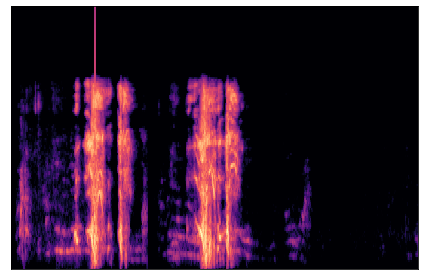

In [ ]:
#pos_data train dataset에 저장
for i in tqdm(range(len(list_pos))):
    S = librosa.feature.melspectrogram(list_pos[i], sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr)
    plt.tight_layout()
    name = str(i)
    plt.savefig('/content/drive/My Drive/audio_predict/train_image/1/'+ name + '.jpg')

4. data agumentation

In [ ]:
list_neg = np.load('/content/drive/My Drive/list_neg.npy',allow_pickle=True)
list_neg =list_neg.tolist()

In [ ]:
list_pos = np.load('/content/drive/My Drive/list_pos.npy',allow_pickle=True)
list_pos =list_pos.tolist()

In [ ]:
# white noise negtive data
for i in tqdm(range(len(list_neg))):
    wn = np.random.randn(len(list_neg[i]))
    neg_wn = list_neg[i] + 0.001*wn

    S = librosa.feature.melspectrogram(neg_wn, sr=sr, n_mels=128) 
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr)
    plt.tight_layout()
    name = str(i)
    plt.savefig('/content/drive/My Drive/audio_predict/train_image/0/'+ name + 'wn.jpg')    

In [ ]:
# white noise positive data
for i in tqdm(range(len(list_pos))):
    wn = np.random.randn(len(list_pos[i]))
    pos_wn = list_pos[i] + 0.001*wn

    S = librosa.feature.melspectrogram(pos_wn, sr=sr, n_mels=128) 
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr)
    plt.tight_layout()
    name = str(i)
    plt.savefig('/content/drive/My Drive/audio_predict/train_image/1/'+ name + 'wn.jpg')    

100%|██████████| 633/633 [7:32:00<00:00, 42.84s/it]


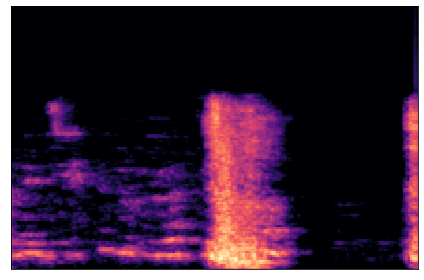

In [ ]:
# stretch_slow negtive data
def stretch(data, rate=1):
    data = librosa.effects.time_stretch(data, rate)
    
    return data

for i in tqdm(range(len(list_neg))):
    data_stretch =stretch(list_neg[i], 0.5)

    S = librosa.feature.melspectrogram(data_stretch, sr=sr, n_mels=128) 
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr)
    plt.tight_layout()
    name = str(i)
    plt.savefig('/content/drive/My Drive/audio_predict/train_image/0/'+ name + 'slow.jpg')    

100%|██████████| 392/392 [1:51:08<00:00, 17.01s/it]


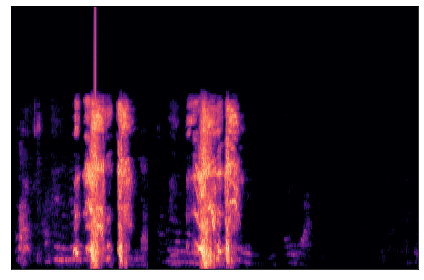

In [ ]:
# stretch_slow positive data
for i in tqdm(range(len(list_pos))):
    data_stretch =stretch(list_pos[i], 0.5)

    S = librosa.feature.melspectrogram(data_stretch, sr=sr, n_mels=128) 
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr)
    plt.tight_layout()
    name = str(i)
    plt.savefig('/content/drive/My Drive/audio_predict/train_image/1/'+ name + 'slow.jpg')    